## Setup

In [74]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download and Load Data

In [75]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [76]:
fetch_housing_data()

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can observe that,
- **total_bedrooms** attribute has some missing values. We will deal with that later.
- All attributes except **ocean_proximity** are numerical attributes. We need to process numerical and categorical attributes seperately.

Saving figure attribute_histogram_plots


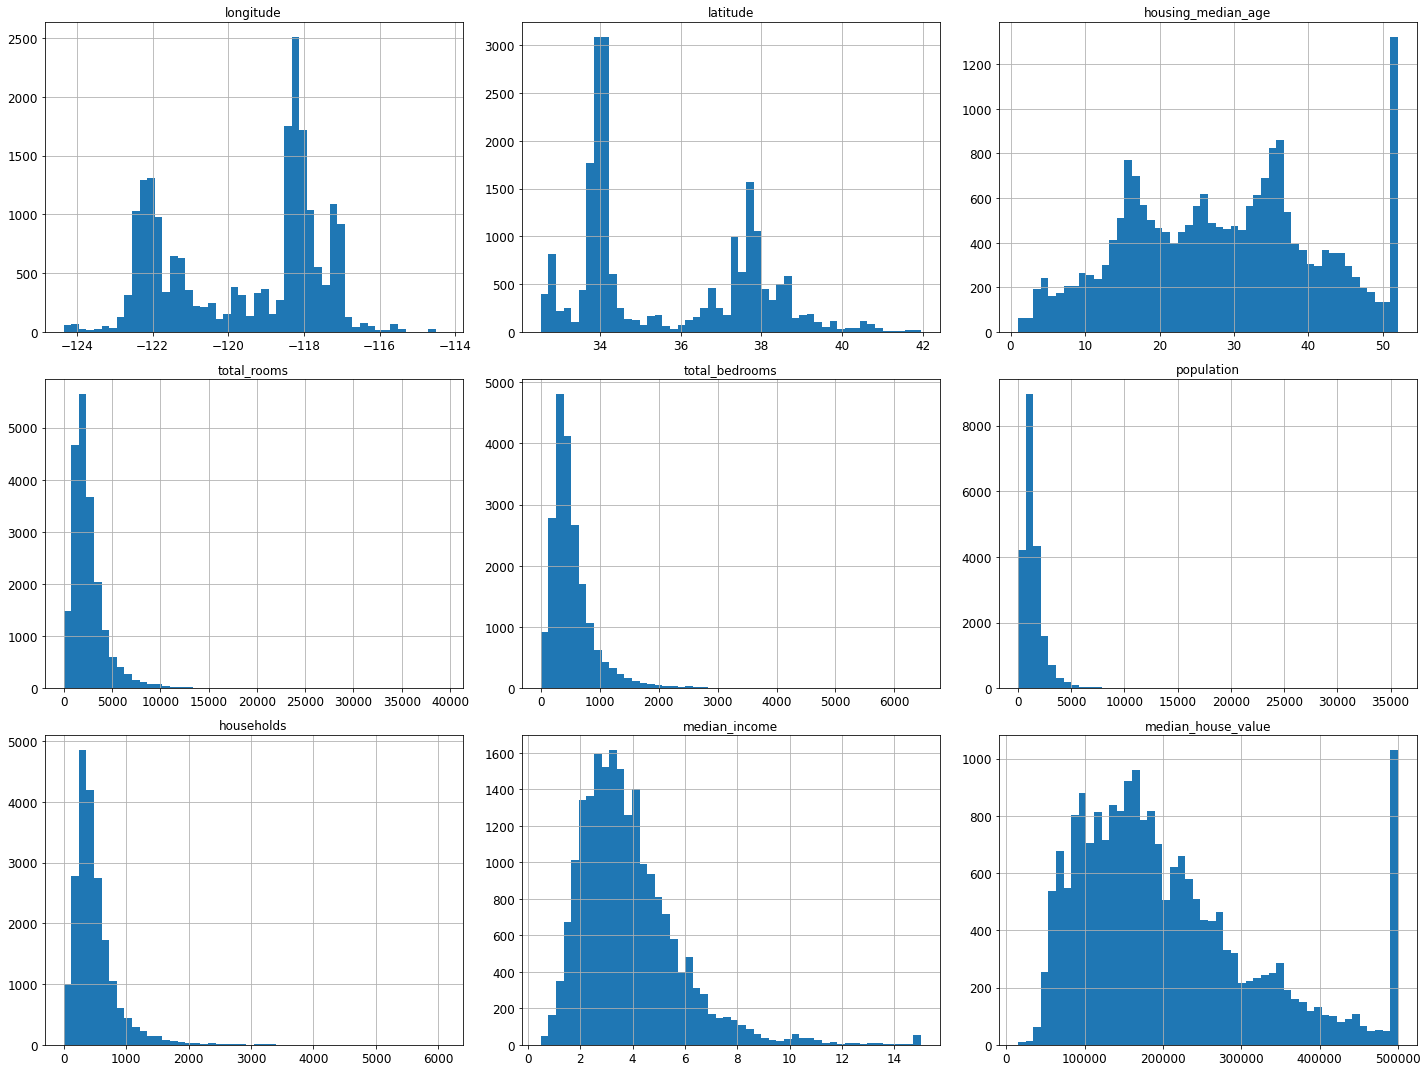

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Visualize Data

Saving figure housing_prices_scatterplot


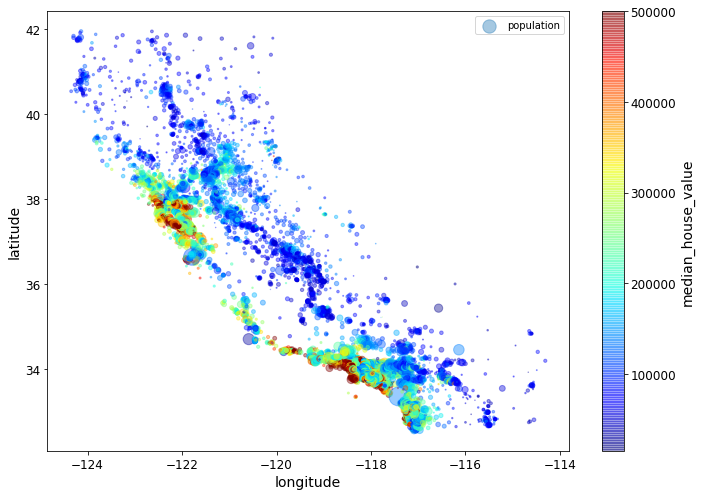

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [81]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x7faa731f1490>)

Saving figure california_housing_prices_plot


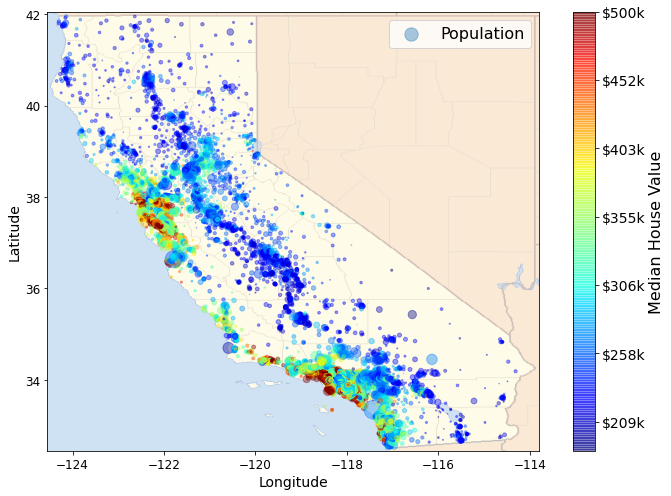

In [82]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

We can observe that median house values are highest near the coast line.

In [83]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

We can see that **median_income** attribute is more positively correlated to the **median_house_value**. So, while dividing the data set set into train/test sets, we need to make sure that both the sets contain data from full range of **median_income**

Saving figure scatter_matrix_plot


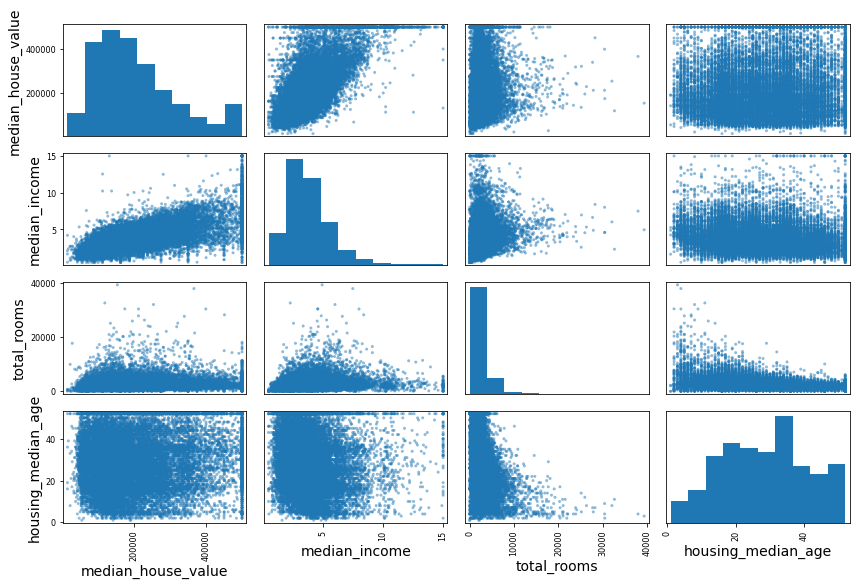

In [84]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


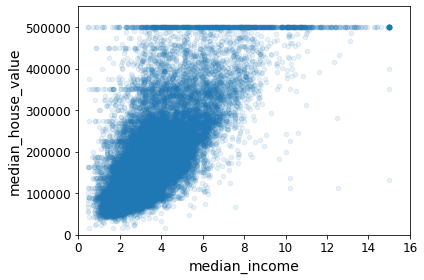

In [85]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

Median House value is capped at 500000

Lets see if any other composite attributes have high effect on **median_house_value**

In [86]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [87]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

The **bedrooms_per_room** composite attribute has a considerable negative correlation to **median_house_value**. We can include this in the set of features to train the model on.

In [88]:
housing = housing.drop("rooms_per_household", axis=1)
housing = housing.drop("population_per_household", axis=1)
housing = housing.drop("bedrooms_per_room", axis=1)

## Splitting Data

We need to make sure both train and test data should contain data from full range of **median_income**. So we do a stratified splitting and check if random splitting and stratified splitting gives comparitively similar data split. 

<AxesSubplot:>

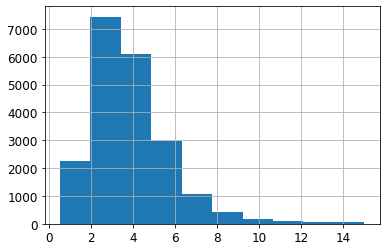

In [89]:
housing["median_income"].hist()

In [90]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [91]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

<AxesSubplot:>

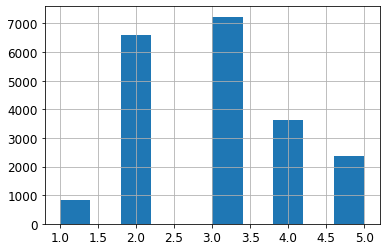

In [92]:
housing["income_cat"].hist()

In [93]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [94]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [95]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [96]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [97]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Stratified splitting gives a better splitting of data. SO we use that instead of random train/test split.

In [98]:
train_data = strat_train_set
test_data = strat_test_set

del strat_train_set
del strat_test_set
del train_set
del test_set

In [99]:
for set_ in (train_data, test_data):
    set_.drop("income_cat", axis=1, inplace=True)

## Preparing Data for ML Algorithms

In [100]:
X = train_data.drop("median_house_value", axis=1) # drop labels for training set
Y = train_data["median_house_value"].copy()

Let's create a custom transformer to add extra attributes:

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

class CompositeAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CompositeAttributesAdder(add_bedrooms_per_room=True)
# X_extra_attribs = attr_adder.transform(X.values)

Now let's build a pipeline for preprocessing the numerical attributes.

We'll assign median values to the missing values in the **total_bedrooms** feature.

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [182]:
X_num = X.drop("ocean_proximity", axis=1)
# alternatively: X_num = X.select_dtypes(include=[np.number])

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CompositeAttributesAdder(add_bedrooms_per_room=True)),
        ('std_scaler', StandardScaler()),
    ])

# X_num_tr = num_pipeline.fit_transform(X_num)

Implementing full pipeline for both numerical and categorical attributes

In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)

In [184]:
X_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Select and Train a Model

In [185]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [186]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg_scores = cross_val_score(lin_reg, X_prepared, Y,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

display_scores(lin_reg_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798343


### Decision Tree

In [187]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_scores = cross_val_score(tree_reg, X_prepared, Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


### Random Forests

In [158]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

forest_scores = cross_val_score(forest_reg, X_prepared, Y,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [49720.94019957 47633.2931555  49854.28757294 52255.82878005
 49313.85899298 53511.61650367 48661.2156046  47520.16668919
 53282.18296675 50075.07299499]
Mean: 50182.846346024664
Standard deviation: 2048.8377493784624


### SVR (Linear Kernel)

In [135]:
from sklearn.svm import SVR

svm_reg_lin = SVR(kernel="linear")

svm_lin_scores = cross_val_score(svm_reg_lin, X_prepared, Y,
                         scoring="neg_mean_squared_error", cv=5)
svm_lin_rmse_scores = np.sqrt(-svm_lin_scores)

display_scores(svm_lin_rmse_scores)

Scores: [109554.16396803 112422.0947246  113970.08259411 113427.52864218
 113430.29743241]
Mean: 112560.8334722674
Standard deviation: 1584.4507648248702


### SVR (rbf Kernel)

In [136]:
svm_reg_rbf = SVR(kernel="rbf")

svm_rbf_scores = cross_val_score(svm_reg_rbf, X_prepared, Y,
                         scoring="neg_mean_squared_error", cv=5)
svm_rbf_rmse_scores = np.sqrt(-svm_rbf_scores)

display_scores(svm_rbf_rmse_scores)

Scores: [115480.65178857 118667.36212113 120054.17974149 119616.06146406
 119284.03553803]
Mean: 118620.45813065572
Standard deviation: 1633.8728518819928


So far, Random Forests Regressor looks promising. Lets Fine tune that model for better results.

## Fine-Tuning Model

In [188]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_prepared, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [189]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [190]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [191]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [192]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=1)
rnd_search.fit(X_prepared, Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faa79509550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faa72bdb190>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [193]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [194]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [195]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [196]:
from sklearn.metrics import mean_squared_error

final_model = rnd_search.best_estimator_

X_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

46910.92117024934

### Calculating 95% confidence Interval

In [197]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([44945.41068188, 48797.32686039])

### A full pipeline with both preparation and prediction

In [198]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(X, Y)
full_pipeline_with_predictor.predict(X_test)

array([424327.91587129, 264520.09425443, 228109.45155968, ...,
       290423.67564301, 192142.16080923, 151202.36199678])

## Extra

### Transformer to select top-k features

In [199]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [200]:
feature_importances = final_model.feature_importances_

In [201]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3451784043801197, 'median_income'),
 (0.1605632289158767, 'INLAND'),
 (0.10846844860879654, 'pop_per_hhold'),
 (0.07246990515559049, 'longitude'),
 (0.07059074984842853, 'bedrooms_per_room'),
 (0.06380803224443841, 'latitude'),
 (0.057444535971841064, 'rooms_per_hhold'),
 (0.04275043945662488, 'housing_median_age'),
 (0.01653438073955306, 'total_rooms'),
 (0.016092910597195798, 'population'),
 (0.015610076150868492, 'total_bedrooms'),
 (0.015214959838627942, 'households'),
 (0.008774413032023276, '<1H OCEAN'),
 (0.003348861998751043, 'NEAR OCEAN'),
 (0.0030896126618977565, 'NEAR BAY'),
 (6.104039936629334e-05, 'ISLAND')]

In [218]:
k = 10
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  2,  3,  5,  7,  8,  9, 10, 12])

In [219]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'median_income', 'rooms_per_hhold', 'pop_per_hhold',
       'bedrooms_per_room', 'INLAND'], dtype='<U18')

In [220]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [221]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(X)

In [222]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.63621141,
        -0.61493744, -0.31205452, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -0.99833135,
         1.33645936,  0.21768338, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.43363936,
        -0.5320456 , -0.46531516, -0.09240499,  0.4222004 ,  0.        ]])

### Single pipeline that does the full data preparation plus the final prediction

In [223]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [224]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('forest_reg', RandomForestRegressor(**rnd_search.best_params_))
])

In [225]:
prepare_select_and_predict_pipeline.fit(X, Y)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CompositeAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                   

In [226]:
final_predictions = prepare_select_and_predict_pipeline.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47356.03911346935

### Automatically explore some preparation options using GridSearchCV

In [228]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(7, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(X, Y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  11.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  11.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total t

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  13.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  17.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  15.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  10.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  10.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  10.8s
[CV

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CompositeAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
      

In [229]:
grid_search_prep.best_params_

{'feature_selection__k': 16, 'preparation__num__imputer__strategy': 'median'}

The best imputer strategy is `median` and apparently all features are useful (16 out of 16).